# ST445 Managing and Visualizing Data
## Dimensionality Reduction
### Milan Vojnovic and Christine Yuen, MT 2017
---

## Homework assignment 

The task is to evaluate computation time for different dimensionality reduction methods considered in class as we vary the number of input data points. The input data is the MNIST handwritten digits data, which we considered in class, but by taking a random sample of data points from it (_random sampling without replacement_). You need to do this for 100 sample sizes that are equividistant in a logarithimic scale (base 10) between the end points 100 to 1083 (1083 is the total number of points in the MNIST dataset); up to rounding to integers. For each sample size and dimensionality reduction method, run 5 repeated computations and then compute and record the mean computation time from these runs. Produce a plot that shows the mean computation time versus the sample size for different dimensionality reduction methods (all in one plot) in log-log scale. Assess and discuss the obtained results.

## Loading the input data points

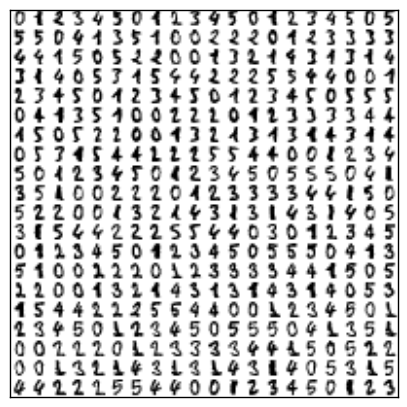

In [1]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_neighbors = 30


# visualizing input data
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=plt.cm.binary);
plt.xticks([]);
plt.yticks([]);

In [2]:
# PCA
def pca_time(X):
    t0 = time()
    clf = decomposition.TruncatedSVD(n_components=2,algorithm='arpack')
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

# MDS
def mds_time(X):
    clf = manifold.MDS(n_components=2, n_init=1, max_iter=200)
    t0 = time()
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

# ISOMAP
def isomap_time(X):
    t0 = time()
    clf = manifold.Isomap(n_neighbors, n_components=2)
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

# Spectral embedding
def spectral_embedding_time(X):
    clf = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack", affinity='nearest_neighbors', n_neighbors=n_neighbors)
    t0 = time()
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

# LLE
def lle_time(X):
    clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='standard')
    t0 = time()
    Y = clf.fit_transform(X)
    dt = time()-t0
    return dt

# HLLE
def hlle_time(X):
    clf = manifold.LocallyLinearEmbedding(n_neighbors=70, n_components=2, method='hessian', random_state=0)
    t0 = time()
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

# LTSA
def ltsa_time(X):
    clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, method='ltsa')
    t0 = time()
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

# t-SNE
def tsne_time(X):
    clf = manifold.TSNE(n_components=2, init='pca', random_state=0, n_iter=200)
    t0 = time()
    Y = clf.fit_transform(X)
    dt = time() - t0
    return dt

In [7]:
sample_sizes = np.floor(np.logspace(2,np.log10(1083),100)).astype(int)
numrep = 5

funcs = [pca_time, mds_time, isomap_time, spectral_embedding_time, lle_time, hlle_time, ltsa_time, tsne_time]

df = pd.DataFrame(index=("pca", "mds", "isomap", "spectral", "lle", "hlle", "ltsa", "tsne"))

for s in sample_sizes:

    ctime = np.zeros((len(funcs),numrep))
    
    for r in range(numrep):

        i = np.random.choice(X.shape[0], s, replace=False)

        for f in range(0,len(funcs)):
            ctime[f,r] = funcs[f](X[i,])
            
    df.loc[:,str(s)] = pd.Series(np.mean(ctime,axis=1), index=df.index)
df

/Users/vojnovic/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 40 is exactly zero. Singular matrix.
  RuntimeWarning)
/Users/vojnovic/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 118 is exactly zero. Singular matrix.
  RuntimeWarning)
/Users/vojnovic/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 71 is exactly zero. Singular matrix.
  RuntimeWarning)
/Users/vojnovic/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 533 is exactly zero. Singular matrix.
  RuntimeWarning)
/Users/vojnovic/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 304 is exactly zero. Singular matrix.
  RuntimeWarning)
/Users/vojnovic/anaconda/lib/python3.5/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 277 is exactly zero. Singular ma

,100,102,104,107,110,112,115,118,121,124,...,872,893,915,937,960,983,1007,1032,1057,1083
pca,0.010353,0.001030,0.000960,0.001115,0.001076,0.001044,0.000990,0.001003,0.001034,0.001184,...,0.002500,0.002365,0.002275,0.002524,0.002173,0.002958,0.002488,0.002994,0.003427,0.003030
mds,0.059101,0.057700,0.053749,0.062249,0.062741,0.058627,0.059443,0.071138,0.075357,0.079250,...,3.837613,3.942699,4.190557,4.306939,4.923558,4.703764,4.900669,6.083114,6.472068,6.663203
isomap,0.004471,0.004810,0.004481,0.005283,0.005499,0.005318,0.005324,0.005489,0.011619,0.012426,...,0.637967,0.639669,0.717180,0.743882,0.772097,0.857999,0.870100,0.910505,0.960328,1.031934
spectral,0.007199,0.007367,0.007180,0.007849,0.008021,0.007245,0.007236,0.007200,0.008170,0.008401,...,0.158697,0.150889,0.168995,0.193093,0.179402,0.212101,0.203510,0.223258,0.231271,0.246590
lle,0.012322,0.014000,0.013245,0.014770,0.016514,0.014265,0.015246,0.015194,0.018348,0.015579,...,0.307826,0.243994,0.274234,0.326944,0.275816,0.316212,0.308828,0.324169,0.319227,0.353877
hlle,0.114210,0.118243,0.111641,0.126742,0.132783,0.127676,0.127491,0.124481,0.131085,0.141043,...,1.351632,1.269276,1.415717,1.478178,1.445980,1.580529,1.450963,1.581013,1.478386,1.649805
ltsa,0.033268,0.031087,0.032257,0.037942,0.035643,0.034454,0.035759,0.035960,0.039003,0.045458,...,0.411913,0.406913,0.417427,0.501196,0.448062,0.497724,0.536170,0.478269,0.493533,0.532956
tsne,0.323855,0.335939,0.368054,0.353150,0.483601,0.413720,0.412106,0.433967,0.469043,0.471866,...,4.674819,4.578649,5.503679,5.303982,4.969565,5.238070,5.366322,5.803189,6.009448,6.305183


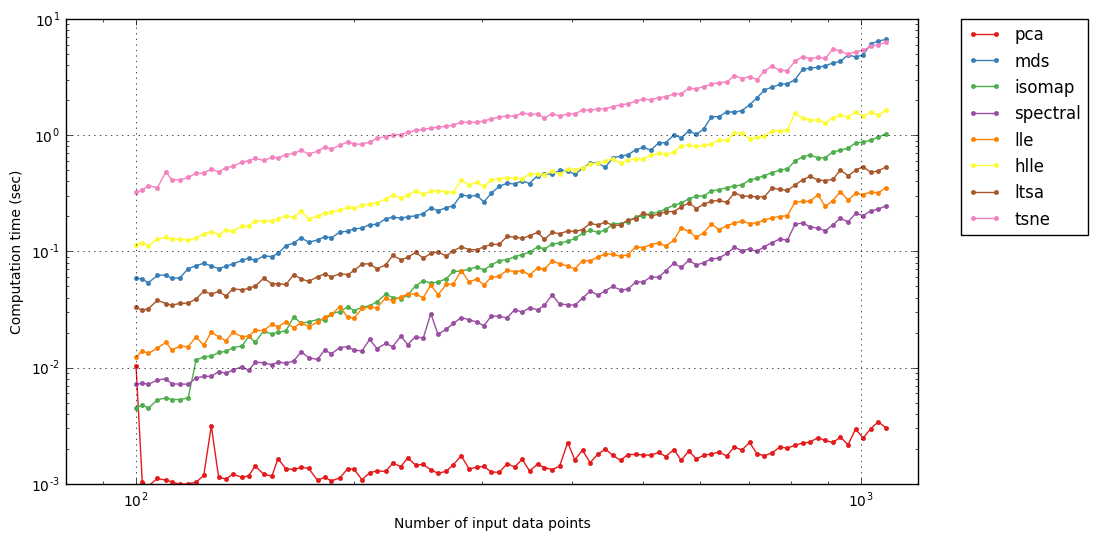

In [10]:
fig, ax = plt.subplots(figsize=(11,6))

for f in range(0,len(df.index)):
    plt.plot(df.iloc[f,:], '.-', color=plt.cm.Set1(f / len(df.index)), label=df.index[f])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Number of input data points')
plt.ylabel('Computation time (sec)')
plt.xlim([80, 1200])
plt.ylim([1e-3, 1e1])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()